In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp

df = pd.read_csv('data/achondroplasia_and_control_dataset.csv')
df.columns

Index(['control_age', 'control_height', 'control_weight', 'achondroplasia_age',
       'achondroplasia_height', 'achondroplasia_weight'],
      dtype='object')

# Linear Regression

R2 train = 0.8443703411441745
R2 test = 0.13727265311772163
MAE train = 2.2968934154056364
MAE test = 5.405576938448867


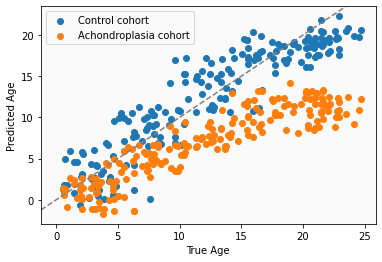

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

X_train = pd.DataFrame({'Height':df['control_height'].values, 
                        'Weight':df['control_weight'].values})
y_train = pd.Series(df['control_age'].values)

X_test = pd.DataFrame({'Height':df['achondroplasia_height'].values, 
                        'Weight':df['achondroplasia_weight'].values})
y_test = pd.Series(df['achondroplasia_age'].values)

model = LinearRegression()
model.fit(X_train, y_train)
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

print(f'R2 train = {r2_score(y_train, y_train_predict)}')
print(f'R2 test = {r2_score(y_test, y_test_predict)}')
print(f'MAE train = {mean_absolute_error(y_train, y_train_predict)}')
print(f'MAE test = {mean_absolute_error(y_test, y_test_predict)}')

plt.scatter(y_train, y_train_predict, label='Control cohort')
plt.scatter(y_test, y_test_predict, label='Achondroplasia cohort')
plt.axline([0, 0], [20, 20], color='grey', ls='--')
plt.ylabel('Predicted Age')
plt.xlabel('True Age')
plt.legend()
plt.show()

In [11]:
ks_2samp(X_train['Height'], X_test['Height']), ks_2samp(X_train['Weight'], X_test['Weight'])

(KstestResult(statistic=0.565, pvalue=8.970241343959439e-30),
 KstestResult(statistic=0.21, pvalue=0.0002829222008740643))

/tmp/ipykernel_11924/823133829.py:18: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = plt.colorbar(im, label='Age, years', location='left')


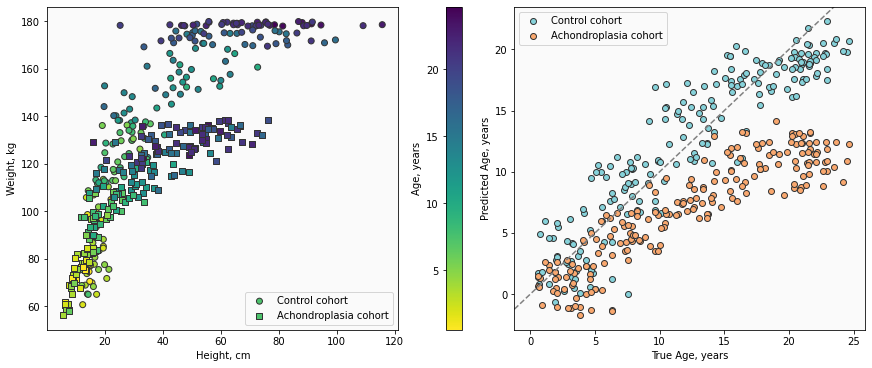

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec
plt.rcParams['axes.facecolor'] = '#fafafa'

# 4 figure
fig = plt.figure(figsize=(12, 5), constrained_layout=True)
gs = GridSpec(1, 2, figure=fig)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

im = ax0.scatter(X_train['Weight'], X_train['Height'], c=y_train,
            edgecolors= "#333333", label='Control cohort', cmap='viridis_r')
ax0.scatter(X_test['Weight'], X_test['Height'], c=y_test, marker='s',
            edgecolors= "#333333", label='Achondroplasia cohort',
            cmap='viridis_r')
cbar = plt.colorbar(im, label='Age, years', location='left')
ax0.set_ylabel('Weight, kg')
ax0.set_xlabel('Height, cm')
ax0.legend()

# ax1 - 
ax1.scatter(y_train, y_train_predict, label='Control cohort', c='#86d2da', edgecolors= "#333333",)
ax1.scatter(y_test, y_test_predict, label='Achondroplasia cohort', c='#f9a86f', edgecolors= "#333333",)
ax1.axline([0, 0], [20, 20], color='grey', ls='--')
ax1.set_ylabel('Predicted Age, years')
ax1.set_xlabel('True Age, years')
ax1.legend()

plt.savefig('figs/achondroplasia_example.pdf', dpi=300, )
plt.show()

/tmp/ipykernel_9470/3087717481.py:19: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = plt.colorbar(im, label='Age, years', location='left')


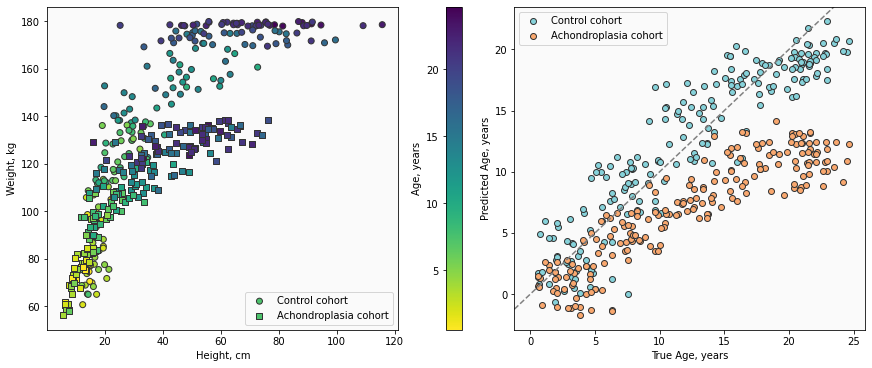

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec
import seaborn as sns
plt.rcParams['axes.facecolor'] = '#fafafa'

# 4 figure
fig = plt.figure(figsize=(12, 5), constrained_layout=True)
gs = GridSpec(1, 2, figure=fig)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

im = ax0.scatter(X_train['Weight'], X_train['Height'], c=y_train,
            edgecolors= "#333333", label='Control cohort', cmap='viridis_r')
ax0.scatter(X_test['Weight'], X_test['Height'], c=y_test, marker='s',
            edgecolors= "#333333", label='Achondroplasia cohort',
            cmap='viridis_r')
cbar = plt.colorbar(im, label='Age, years', location='left')
ax0.set_ylabel('Weight, kg')
ax0.set_xlabel('Height, cm')
ax0.legend()

# ax1 - 
ax1.scatter(y_train, y_train_predict, label='Control cohort', c='#86d2da', edgecolors= "#333333",)
ax1.scatter(y_test, y_test_predict, label='Achondroplasia cohort', c='#f9a86f', edgecolors= "#333333",)
ax1.axline([0, 0], [20, 20], color='grey', ls='--')
ax1.set_ylabel('Predicted Age, years')
ax1.set_xlabel('True Age, years')
ax1.legend()

plt.savefig('figs/achondroplasia_example_AB.pdf', dpi=300, )
plt.show()

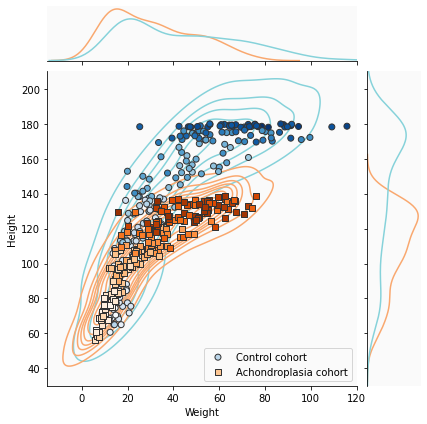

In [7]:
X_train['condition'] = 'Control cohort'
X_test['condition'] = 'Achondroplasia cohort'
X = pd.concat([X_train, X_test]).reset_index()

g = sns.jointplot(data=X, x='Weight', y='Height', 
                  kind='kde', 
                  hue='condition',
                  palette=['#86d2da', '#f9a86f']
                  )
g.ax_joint.scatter(X_train['Weight'], X_train['Height'], c=y_train, zorder=4, marker='o',
                   cmap='Blues', edgecolors= "#333333", label='Control cohort')
g.ax_joint.scatter(X_test['Weight'], X_test['Height'], c=y_test, zorder=4, marker='s',
                   cmap='Oranges', edgecolors= "#333333", label='Achondroplasia cohort')
g.ax_joint.legend(loc='lower right')

g.ax_joint.set_xlim([-15, 120])
g.ax_joint.set_ylim([30, 210])

plt.savefig('figs/achondroplasia_example_A.pdf', dpi=300, )
plt.show()

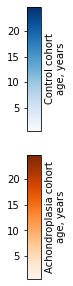

In [8]:
import matplotlib as mpl
fig, ax = plt.subplots(2, 1, figsize=(0.25, 5))

cb1 = mpl.colorbar.ColorbarBase(ax[0], cmap='Blues',
                                norm=plt.Normalize(vmin=y_train.min(), 
                                                   vmax=y_train.max()),
                                orientation='vertical')
cb1.set_label('Control cohort\nage, years')
ax[0].yaxis.set_ticks_position('left')
# Create a colorbar for the second cohort
cb2 = mpl.colorbar.ColorbarBase(ax[1], cmap='Oranges',
                                norm=plt.Normalize(vmin=y_test.min(), 
                                                   vmax=y_test.max()),
                                orientation='vertical')
cb2.set_label('Achondroplasia cohort\nage, years')
ax[1].yaxis.set_ticks_position('left')

plt.savefig('figs/achondroplasia_example_A_cbar.pdf', dpi=300, )
plt.show()